In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import optuna

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import KFold

import optuna
from optuna.samplers import TPESampler

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')
train.drop(columns=['id'], axis=1, inplace=True)
test.drop(columns=['id'], axis=1, inplace=True)

In [3]:
encoder = LabelEncoder()
scaler = MinMaxScaler()

train['Sex'] = encoder.fit_transform(train['Sex'])
test['Sex'] = encoder.transform(test['Sex'])

cat_cols = ['Sex']
target = 'Rings'
continuous_cols = [col for col in train.columns if col not in cat_cols + [target]]

train[continuous_cols] = scaler.fit_transform(train[continuous_cols])
test[continuous_cols] = scaler.transform(test[continuous_cols])

X = train.drop(columns=['Rings'], axis=1).values
y = train['Rings'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.27, random_state=24)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Create TensorDataset instances for training and validation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
batch_size = 122
# Create DataLoader instances for training and validation
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [7]:
class TABPFNModel(nn.Module):
    def __init__(self, input_dim, hidden_dims, dropout):
        super(TABPFNModel, self).__init__()
        layers = []
        prev_dim = input_dim
        for dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            prev_dim = dim
        layers.append(nn.Linear(prev_dim, 1))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

In [10]:
params = {'hidden_dims': [144], 
          'dropout': 0.4100531293444458
         }
input_dim = X_train_tensor.shape[1]
model = TABPFNModel(input_dim, **params)

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [1/45], Train Loss: 8.6998, Val Loss: 4.5271


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [2/45], Train Loss: 5.0821, Val Loss: 4.3615


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [3/45], Train Loss: 4.8339, Val Loss: 3.9305


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [4/45], Train Loss: 4.6971, Val Loss: 3.9134


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [5/45], Train Loss: 4.5871, Val Loss: 3.8809


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [6/45], Train Loss: 4.5383, Val Loss: 3.8288


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [7/45], Train Loss: 4.3653, Val Loss: 3.8075


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [8/45], Train Loss: 4.3803, Val Loss: 3.8090


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [9/45], Train Loss: 4.3286, Val Loss: 3.8044


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [10/45], Train Loss: 4.3431, Val Loss: 3.8055


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [11/45], Train Loss: 4.3146, Val Loss: 3.7992


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [12/45], Train Loss: 4.3003, Val Loss: 3.8152


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [13/45], Train Loss: 4.3092, Val Loss: 3.8049


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [14/45], Train Loss: 4.3161, Val Loss: 3.7989


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [15/45], Train Loss: 4.3180, Val Loss: 3.7995


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [16/45], Train Loss: 4.3121, Val Loss: 3.8000


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [17/45], Train Loss: 4.2967, Val Loss: 3.7983


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [18/45], Train Loss: 4.2937, Val Loss: 3.7993


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [19/45], Train Loss: 4.2909, Val Loss: 3.8004


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [20/45], Train Loss: 4.2926, Val Loss: 3.8006


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [21/45], Train Loss: 4.3002, Val Loss: 3.7998


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [22/45], Train Loss: 4.2909, Val Loss: 3.7997


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Epoch [23/45], Train Loss: 4.2938, Val Loss: 3.8003


  0%|          | 0/543 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Early stopping at epoch 24


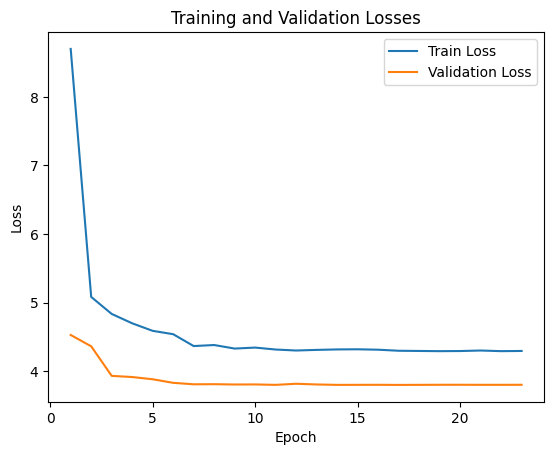

In [11]:
# Initialize variables for early stopping
best_val_loss = float('inf')  # Initialize best_val_loss here
best_model_state = None
patience_counter = 0
early_stopping_patience = 7  # Define the patience for early stopping


EPOCHS = 45
initial_lr = 0.006  # Start with a small learning rate
lr_step_size = 6   # Update the learning rate every 6 epochs
lr_gamma = 0.1      # Multiply the learning rate by 0.1 every lr_step_size epochs
criterion = nn.MSELoss()

# Define your optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=initial_lr)

# Define your learning rate scheduler
scheduler = StepLR(optimizer, step_size=lr_step_size, gamma=lr_gamma)

train_losses = []
val_losses = []

for epoch in trange(EPOCHS):
    # Training phase
    avg_train_loss = []
    model.train()  # Set model to training mode
    for i, (image, mask) in enumerate(tqdm(train_loader)):
        image, mask = image.to(device), mask.to(device)
        optimizer.zero_grad()
        output = model(image)
        mask = mask.view(-1, 1) 
        loss = criterion(output, mask)
        loss.backward()
        optimizer.step()
        avg_train_loss.append(loss.item())

    avg_train_loss = np.mean(avg_train_loss)

    # Validation phase
    avg_val_loss = []
    model.eval()  # Set model to evaluation mode
    for j, (image, mask) in enumerate(tqdm(val_loader)):
        image, mask = image.to(device), mask.to(device)
        with torch.no_grad():
            output = model(image)
            mask = mask.view(-1, 1)
            loss = criterion(output, mask)
            avg_val_loss.append(loss.item())

    avg_val_loss = np.mean(avg_val_loss)

     # Check for early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    tqdm.write(f"Epoch [{epoch+1}/{EPOCHS}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Apply learning rate scheduling
    scheduler.step()

    # Append the losses for this epoch
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

# Create a DataFrame to store the losses
loss_df = pd.DataFrame({'val_loss': val_losses, 'train_loss': train_losses})

# Plot the losses
plt.plot(loss_df.index + 1, loss_df['train_loss'], label='Train Loss')
plt.plot(loss_df.index + 1, loss_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [12]:
# Inference
with torch.no_grad():
    model.eval()
    predictions = model(X_val_tensor.to(device)).cpu().numpy()
    RMSE = np.sqrt(mean_squared_error(y_val_tensor, predictions.reshape(-1, 1)))
RMSE

1.9494407

## Hyperparameter tune

In [6]:
def train_model(X_train_tensor, y_train_tensor, val_loader, params):
    input_dim = params['input_dim']
    hidden_dims = params['hidden_dims']
    dropout = params['dropout']
    num_epochs = 200
    batch_size = 122
    learning_rate = 0.001
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    model = TABPFNModel(input_dim, hidden_dims, dropout).to(device)
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    best_val_loss = float('inf')  # Initialize best_val_loss here
    best_model_state = None
    patience_counter = 0
    early_stopping_patience = 7  # Define the patience for early stopping
    
    for epoch in tqdm(range(num_epochs)):
        model.train()
        epoch_train_loss = 0.0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * batch_X.size(0)
        
        # Calculate validation loss after each epoch
        model.eval()
        with torch.no_grad():
            val_loss = 0
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                val_loss += criterion(outputs, batch_y).item() * batch_X.size(0)
            avg_val_loss = val_loss / len(val_loader.dataset)
        
        # Log training and validation loss for each epoch
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss / len(train_loader.dataset):.4f}, Validation Loss: {avg_val_loss:.4f}")
        
        # Check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch+1}")
                break
    
    # Load the best model state
    model.load_state_dict(best_model_state)
    
    return model

def objective(trial):
    input_dim = X_train.shape[1]
    hidden_dims = [trial.suggest_int(f'n_units_{i}', 32, 256) for i in range(trial.suggest_int('n_layers', 1, 4))]
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    
    params = {
        'input_dim': input_dim,
        'hidden_dims': hidden_dims,
        'dropout': dropout
    }
    
    model = train_model(X_train_tensor, y_train_tensor, val_loader, params)
    
    model.eval()
    predictions = []
    with torch.no_grad():
        for batch_X, _ in tqdm(val_loader):
            batch_X = batch_X.to(device)
            outputs = model(batch_X)
            predictions.append(outputs.cpu().numpy())
    
    predictions = np.concatenate(predictions)
    val_rmse = np.sqrt(mean_squared_error(y_val, predictions))
    
    return val_rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Best hyperparameters:", study.best_params)
print("Best validation RMSE:", study.best_value)


[I 2024-04-20 15:05:49,067] A new study created in memory with name: no-name-4a28b52a-e19d-41e4-8b31-4679c23868e5


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 10.4033, Validation Loss: 6.2564
Epoch [2/200], Train Loss: 6.5193, Validation Loss: 5.8946
Epoch [3/200], Train Loss: 5.7808, Validation Loss: 4.3284
Epoch [4/200], Train Loss: 5.4704, Validation Loss: 4.1409
Epoch [5/200], Train Loss: 5.2268, Validation Loss: 4.1971
Epoch [6/200], Train Loss: 5.0714, Validation Loss: 3.7510
Epoch [7/200], Train Loss: 4.9515, Validation Loss: 3.7800
Epoch [8/200], Train Loss: 4.8870, Validation Loss: 3.7459
Epoch [9/200], Train Loss: 4.8582, Validation Loss: 3.7157
Epoch [10/200], Train Loss: 4.7951, Validation Loss: 3.6744
Epoch [11/200], Train Loss: 4.7256, Validation Loss: 3.9373
Epoch [12/200], Train Loss: 4.6687, Validation Loss: 3.6798
Epoch [13/200], Train Loss: 4.6173, Validation Loss: 3.6379
Epoch [14/200], Train Loss: 4.5825, Validation Loss: 3.6542
Epoch [15/200], Train Loss: 4.5657, Validation Loss: 3.6524
Epoch [16/200], Train Loss: 4.5705, Validation Loss: 3.6774
Epoch [17/200], Train Loss: 4.5099, Validation L

  0%|          | 0/201 [00:00<?, ?it/s]

[I 2024-04-20 15:07:30,571] Trial 0 finished with value: 1.8953091232462542 and parameters: {'n_layers': 3, 'n_units_0': 161, 'n_units_1': 251, 'n_units_2': 174, 'dropout': 0.476162853385801}. Best is trial 0 with value: 1.8953091232462542.


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 9.1291, Validation Loss: 4.7868
Epoch [2/200], Train Loss: 5.4915, Validation Loss: 6.4760
Epoch [3/200], Train Loss: 5.0134, Validation Loss: 4.1759
Epoch [4/200], Train Loss: 4.8406, Validation Loss: 3.9709
Epoch [5/200], Train Loss: 4.7290, Validation Loss: 4.2008
Epoch [6/200], Train Loss: 4.6330, Validation Loss: 3.8199
Epoch [7/200], Train Loss: 4.5480, Validation Loss: 3.7917
Epoch [8/200], Train Loss: 4.5191, Validation Loss: 3.6350
Epoch [9/200], Train Loss: 4.4858, Validation Loss: 3.8297
Epoch [10/200], Train Loss: 4.4879, Validation Loss: 3.8186
Epoch [11/200], Train Loss: 4.4656, Validation Loss: 3.6076
Epoch [12/200], Train Loss: 4.4031, Validation Loss: 3.7788
Epoch [13/200], Train Loss: 4.2953, Validation Loss: 3.6914
Epoch [14/200], Train Loss: 4.3144, Validation Loss: 3.6857
Epoch [15/200], Train Loss: 4.2450, Validation Loss: 3.5511
Epoch [16/200], Train Loss: 4.2173, Validation Loss: 3.5751
Epoch [17/200], Train Loss: 4.2160, Validation Lo

  0%|          | 0/201 [00:00<?, ?it/s]

[I 2024-04-20 15:08:36,824] Trial 1 finished with value: 1.9887059638074114 and parameters: {'n_layers': 4, 'n_units_0': 135, 'n_units_1': 144, 'n_units_2': 233, 'n_units_3': 189, 'dropout': 0.2910903212827516}. Best is trial 0 with value: 1.8953091232462542.


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 19.9787, Validation Loss: 5.8894
Epoch [2/200], Train Loss: 7.1629, Validation Loss: 5.6053
Epoch [3/200], Train Loss: 6.7277, Validation Loss: 5.2311
Epoch [4/200], Train Loss: 6.3829, Validation Loss: 4.9141
Epoch [5/200], Train Loss: 6.0864, Validation Loss: 4.6483
Epoch [6/200], Train Loss: 5.7699, Validation Loss: 4.3850
Epoch [7/200], Train Loss: 5.5021, Validation Loss: 4.2203
Epoch [8/200], Train Loss: 5.2983, Validation Loss: 4.0592
Epoch [9/200], Train Loss: 5.1927, Validation Loss: 4.0202
Epoch [10/200], Train Loss: 5.0964, Validation Loss: 3.9668
Epoch [11/200], Train Loss: 5.0184, Validation Loss: 3.9453
Epoch [12/200], Train Loss: 4.9541, Validation Loss: 3.9274
Epoch [13/200], Train Loss: 4.8900, Validation Loss: 3.9330
Epoch [14/200], Train Loss: 4.8136, Validation Loss: 3.9230
Epoch [15/200], Train Loss: 4.7998, Validation Loss: 3.8745
Epoch [16/200], Train Loss: 4.7423, Validation Loss: 3.8935
Epoch [17/200], Train Loss: 4.6921, Validation L

  0%|          | 0/201 [00:00<?, ?it/s]

[I 2024-04-20 15:10:33,554] Trial 2 finished with value: 1.9238096116924044 and parameters: {'n_layers': 1, 'n_units_0': 129, 'dropout': 0.49940951926184507}. Best is trial 0 with value: 1.8953091232462542.


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 13.2708, Validation Loss: 5.6311
Epoch [2/200], Train Loss: 6.8755, Validation Loss: 4.2118
Epoch [3/200], Train Loss: 5.6829, Validation Loss: 4.4938
Epoch [4/200], Train Loss: 5.2429, Validation Loss: 3.9111
Epoch [5/200], Train Loss: 5.0512, Validation Loss: 3.9221
Epoch [6/200], Train Loss: 4.9051, Validation Loss: 3.8449
Epoch [7/200], Train Loss: 4.8362, Validation Loss: 3.8922
Epoch [8/200], Train Loss: 4.7622, Validation Loss: 3.7668
Epoch [9/200], Train Loss: 4.6940, Validation Loss: 3.8298
Epoch [10/200], Train Loss: 4.6431, Validation Loss: 3.9158
Epoch [11/200], Train Loss: 4.6337, Validation Loss: 3.7457
Epoch [12/200], Train Loss: 4.5856, Validation Loss: 3.7086
Epoch [13/200], Train Loss: 4.5696, Validation Loss: 3.7065
Epoch [14/200], Train Loss: 4.5517, Validation Loss: 3.8302
Epoch [15/200], Train Loss: 4.5396, Validation Loss: 3.7311
Epoch [16/200], Train Loss: 4.5431, Validation Loss: 3.9198
Epoch [17/200], Train Loss: 4.5457, Validation L

  0%|          | 0/201 [00:00<?, ?it/s]

[I 2024-04-20 15:11:33,347] Trial 3 finished with value: 1.916324826869176 and parameters: {'n_layers': 3, 'n_units_0': 69, 'n_units_1': 57, 'n_units_2': 203, 'dropout': 0.41697310599922577}. Best is trial 0 with value: 1.8953091232462542.


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Train Loss: 9.4766, Validation Loss: 4.9154
Epoch [2/200], Train Loss: 5.4188, Validation Loss: 4.0977
Epoch [3/200], Train Loss: 4.9129, Validation Loss: 3.8849
Epoch [4/200], Train Loss: 4.6621, Validation Loss: 3.9822
Epoch [5/200], Train Loss: 4.5777, Validation Loss: 3.9482
Epoch [6/200], Train Loss: 4.4236, Validation Loss: 3.9663
Epoch [7/200], Train Loss: 4.3889, Validation Loss: 3.7242
Epoch [8/200], Train Loss: 4.3045, Validation Loss: 3.7083
Epoch [9/200], Train Loss: 4.2580, Validation Loss: 3.6828
Epoch [10/200], Train Loss: 4.2159, Validation Loss: 3.7127
Epoch [11/200], Train Loss: 4.1580, Validation Loss: 3.6851
Epoch [12/200], Train Loss: 4.1460, Validation Loss: 3.6699
Epoch [13/200], Train Loss: 4.1285, Validation Loss: 3.6894
Epoch [14/200], Train Loss: 4.0945, Validation Loss: 3.7407
Epoch [15/200], Train Loss: 4.1010, Validation Loss: 3.6492
Epoch [16/200], Train Loss: 4.0430, Validation Loss: 3.6903
Epoch [17/200], Train Loss: 4.0352, Validation Lo

[W 2024-04-20 15:13:34,407] Trial 4 failed with parameters: {'n_layers': 2, 'n_units_0': 193, 'n_units_1': 244, 'dropout': 0.33086235679533893} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_34/1588159313.py", line 76, in objective
    model = train_model(X_train_tensor, y_train_tensor, val_loader, params)
  File "/tmp/ipykernel_34/1588159313.py", line 32, in train_model
    loss.backward()
  File "/opt/conda/lib/python3.10/site-packages/torch/_tensor.py", line 492, in backward
    torch.autograd.backward(
  File "/opt/conda/lib/python3.10/site-packages/torch/autograd/__init__.py", line 251, in backward
    Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
KeyboardInterrupt
[W 2024-04-20 15:13:34,411] Trial 4 failed with value None.


KeyboardInterrupt: 